***Activity 9***

In [1]:
# Import necessary libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [38]:
# Assign the url to a variable
gutenberg = 'https://www.gutenberg.org/browse/scores/top#books-last1'

In [39]:
# Use the get method to get a response from this page
response = requests.get(gutenberg)
type(response)

requests.models.Response

In [9]:
# Create a function to check the status of the response
def status_check(r):
    if r.status_code==200:
        print('Success!')
        return 1
    else:
        print('Failed!')
        return -1

In [40]:
# Check the status
status_check(response)

Success!


1

In [11]:
# Create a function to find out the type of encoding and one to decode the response
def encoding_check(r):
    return(r.encoding)

def decode_content(r, encoding):
    return(r.content.decode(encoding))

In [41]:
# Decode the response
contents = decode_content(response, encoding_check(response))
type(contents)

str

In [50]:
# Pass contents to BeautifulSoup for parsing
soup = BeautifulSoup(contents, 'html.parser')
text_dump=soup.text

In [46]:
# Create a for loop to find all href tags of the top 100 and put them in a list
href_list = []

for h in soup.find_all('h2'):
    if(h.get('id')=="books-last1"):
        for i in h.find_all('a', href=True):
            href_list.append(i.text)

In [47]:
# Print first 30 of href list
href_list[:30]

[]


In [53]:
# I couldn't figure out what I was doing wrong, so I checked the solutions file. I thought they just wanted the hrefs for 
# the top 100 books only, but the solution just takes all the hrefs, so I'm going to change my loop to do that and 
# hopefully it works this time since it's a much simpler task.
href_list = []

for h in soup.find_all('a'):
    href_list.append(h.get('href'))

In [56]:
# Print first 30 of href list
href_list[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [58]:
# Use regex to find numeric digits in links (Number 19 to 118 in the original list of links have the Top 100 ebooks)
# I'm pretty unfamiliar with regex and didn't really understand how the numbers in the href correlated with the top 
# 100 books, so I used the solutions file to complete this part. 
booknum = []
for i in range(19,119):
    link=href_list[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [59]:
# Print the file numbers for the top 100 books
print(booknum)

[1, 1, 7, 7, 30, 30, 15651, 20119, 84, 1232, 1342, 25344, 2542, 1250, 46, 1952, 5200, 11, 16328, 43, 1080, 844, 98, 41, 345, 23, 160, 2701, 1661, 63598, 1260, 205, 76, 74, 174, 1064, 408, 42108, 1400, 2591, 219, 209, 42324, 203, 215, 2852, 63597, 16, 1497, 3207, 120, 3825, 15399, 158, 63596, 6130, 3600, 514, 36, 62364, 2500, 2814, 902, 55, 45, 58585, 2600, 4300, 38269, 113, 2148, 42884, 1727, 768, 1184, 19068, 63599, 2554, 779, 996, 19942, 63591, 140, 5740, 40074, 12122, 11030, 57775, 34901, 135, 27827, 28054]


In [81]:
# Print the first 2000 words of the text_dump file. I had set this up earlier in the activity, so i just have to print it.
print(text_dump[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2020-11-02235509
last 7 days1427807
last 30 days6136204



Top 100 EBooks yesterd

In [76]:
# Use regex to find everything after Top 100 Ebooks yesterday
pattern = re.compile(r'(?:Top 100 EBooks yesterday).*$')
print(pattern.search(text_dump).group())

AttributeError: 'NoneType' object has no attribute 'group'

In [87]:
# After messing with that for a bit, I gave up and looked at the solutions file again. Seems I need some more help 
# with this whole regex thing and once again, i misinterpreted what the assignment was asking for. 
# Split the text by lines and index them after the string for Top 100 EBooks yesterday
start_idx = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [97]:
# Create a loop to pull out the first 100 lines. Used trial and error to find out that I wanted to start on the 10th line.
top_100 = []
for i in range(100):
    top_100.append(soup.text.splitlines()[start_idx+10+i])

top_100

['His Grace of Osmonde by Frances Hodgson Burnett (4650)',
 'Ambrotox and Limping Dick by Oliver Fleming (4527)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (4074)',
 'Il Principe. English by Niccolò Machiavelli (3472)',
 'Pride and Prejudice by Jane Austen (2953)',
 'The Scarlet Letter by Nathaniel Hawthorne (2576)',
 'Et dukkehjem. English by Henrik Ibsen (1785)',
 'Anthem by Ayn Rand (1400)',
 'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (1375)',
 'The Yellow Wallpaper by Charlotte Perkins Gilman (1337)',
 'Metamorphosis by Franz Kafka (1238)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1234)",
 'Beowulf: An Anglo-Saxon Epic Poem (1208)',
 'The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (1180)',
 'A Modest Proposal by Jonathan Swift (1143)',
 'The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (1142)',
 'A Tale of Two Cities by Charles Dickens (1139)',


***Activity 10***

In [105]:
# Import necessary libraries
import urllib.request, urllib.parse, urllib.error
import json

In [127]:
# Load the secret API key
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [128]:
# Assign the url and api key with my secret api key variable
serviceurl = "http://www.omdbapi.com/?"
apikey = "&apikey=" + omdbapi

In [129]:
# Create function to print categories and data from json file
def print_json(json_data):
    categories = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for c in categories:
        if c in list(json_data.keys()):
            print("{}: {}".format(c, json_data[c]))    

In [130]:
# Create function that downloads the movie poster and save it to my local folder.
# I feel like I missed a lesson here...I had to use the solutions file to get this done because I don't even know how 
# to deal with the poster data which is a url for an image.
def movie_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension = poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation = os.getcwd()+'\\'+'Posters'+'\\'
    
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename = savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [131]:
# After reading the function, it totally makes sense. Next time I think I could piece that together on my own. 
# Create a funtion to search for a movie by it's title and retrieve that json data for it.
def search_movie(movie_name):
    try:  
        dict = {'t': str(movie_name)}
        movie = urllib.parse.urlencode(dict)
        finalurl = serviceurl + movie + apikey
        uh = urllib.request.urlopen(finalurl)
        data = uh.read()
        json_data = json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            movie_poster(json_data)
        else:
            print(json_data['Error'])    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [135]:
# Test search_movie function with titanic
search_movie('Titanic')

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,029,426
imdbID: tt0120338


In [136]:
# Cause an error to make sure the function works properly
search_movie('Random_error')

Movie not found!


In [ ]:
# Yeah! I checked and the movie poster was returned properly!!

***Activity 3***

In [4]:
# install python-twitter library
!pip install python-twitter

In [6]:
# Load in my keys from a json file
import json

with open('twitter_keys.json') as f:
    keys = json.load(f)
    consumer_key = keys['consumer_key']
    consumer_secret = keys['consumer_secret']
    access_token_key = keys['access_token_key']
    access_token_secret = keys['access_token_secret']

In [8]:
# import twitter library using my keys & token
import twitter
api = twitter.Api(consumer_key=consumer_key,
    consumer_secret=consumer_secret,
    access_token_key=access_token_key,
    access_token_secret=access_token_secret)

In [9]:
# Make sure the api was able to verify my credentials
print(api.VerifyCredentials())

{"created_at": "Thu Nov 05 17:52:11 +0000 2020", "default_profile": true, "default_profile_image": true, "id": 1324409137808216066, "id_str": "1324409137808216066", "name": "Myra Rust", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "MyraRust"}


In [16]:
# Conduct a search for latest 10 tweets that contained the term "Bellevue University", since Oct 1, 2020.
api.GetSearch(term='Bellevue University', since=2020-10-1, count=10)

[Status(ID=1324302484932829185, ScreenName=JimNekuda, Created=Thu Nov 05 10:48:11 +0000 2020, Text="RT @corporatelearn: There's a difference between moving learning online and online learning that MOVES. Bellevue University has been leadin…"),
 Status(ID=1324118728037072900, ScreenName=corporatelearn, Created=Wed Nov 04 22:38:00 +0000 2020, Text="There's a difference between moving learning online and online learning that MOVES. Bellevue University has been le… https://t.co/VRuy917Boc"),
 Status(ID=1324116186427174912, ScreenName=thealexgalgano, Created=Wed Nov 04 22:27:54 +0000 2020, Text='@coachaylward @bubruins @ Bellevue University https://t.co/ye1dv1JDCY'),
 Status(ID=1323792136945442817, ScreenName=macwwd, Created=Wed Nov 04 01:00:14 +0000 2020, Text='RoundTable Monthly Leaders Meetings\nLocation: Multi-Purpose Room located on the lower level of the Administrative S… https://t.co/JxIFZ8ijNw'),
 Status(ID=1323706955089633280, ScreenName=chadhoward1998, Created=Tue Nov 03 19:21:46 

In [17]:
# Conduct a search for latest 10 tweets that contained the term "Data Science", since Oct 1, 2020.
api.GetSearch(term="data science", since=2020-10-1, count=10)

[Status(ID=1324070665272598531, ScreenName=HHSGov, Created=Wed Nov 04 19:27:01 +0000 2020, Text='Using #science, data, and the foremost experts in their fields, a safe &amp; effective #COVID19 #vaccine is being devel… https://t.co/HRp8ZnYv2z'),
 Status(ID=1324452451353825280, ScreenName=hadleywickham, Created=Thu Nov 05 20:44:06 +0000 2020, Text='And R for Data Science also gets the new bs4_book treatment: https://t.co/6zKz6iGyCI #rstats'),
 Status(ID=1323945003606069248, ScreenName=mirandarwolpert, Created=Wed Nov 04 11:07:41 +0000 2020, Text='Today @wellcometrust  launch a call for a delivery partner to run a data challenge focusing on mental health in you… https://t.co/j3Eqe3Y40Q'),
 Status(ID=1324511734569328641, ScreenName=OGSteele, Created=Fri Nov 06 00:39:40 +0000 2020, Text='RT @hadleywickham: And R for Data Science also gets the new bs4_book treatment: https://t.co/6zKz6iGyCI #rstats'),
 Status(ID=1324511685332316163, ScreenName=peterdalgaard, Created=Fri Nov 06 00:39:28 +0000

***Activity 4***

In [23]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read in file using pandas. I've choosen to use a data set from kaggle that lists the top 50 best selling books on
# Amazon each year 2009-2019. I think it has a lot of potential for interesting visualizations.
books = pd.read_csv("bestsellers.csv")
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [12]:
# I want to see the counts for books in each genre by year. I have to use the crosstab method to do this. 
genre_counts = pd.crosstab(books['Year'], books['Genre'])
genre_counts

Genre,Fiction,Non Fiction
Year,,
2009,24,26
2010,20,30
2011,21,29
2012,21,29
2013,24,26
2014,29,21
2015,17,33
2016,19,31
2017,24,26


In [13]:
# I want to plot a bar chart that shows the percentage of eacch genre, so I am going to normalize to the data 
# so that each row sums to 1.
genre_pcts = genre_counts.div(genre_counts.sum(1), axis=0)
genre_pcts

Genre,Fiction,Non Fiction
Year,,
2009,0.48,0.52
2010,0.40,0.60
2011,0.42,0.58
2012,0.42,0.58
2013,0.48,0.52
2014,0.58,0.42
2015,0.34,0.66
2016,0.38,0.62
2017,0.48,0.52


<IPython.core.display.Javascript object>


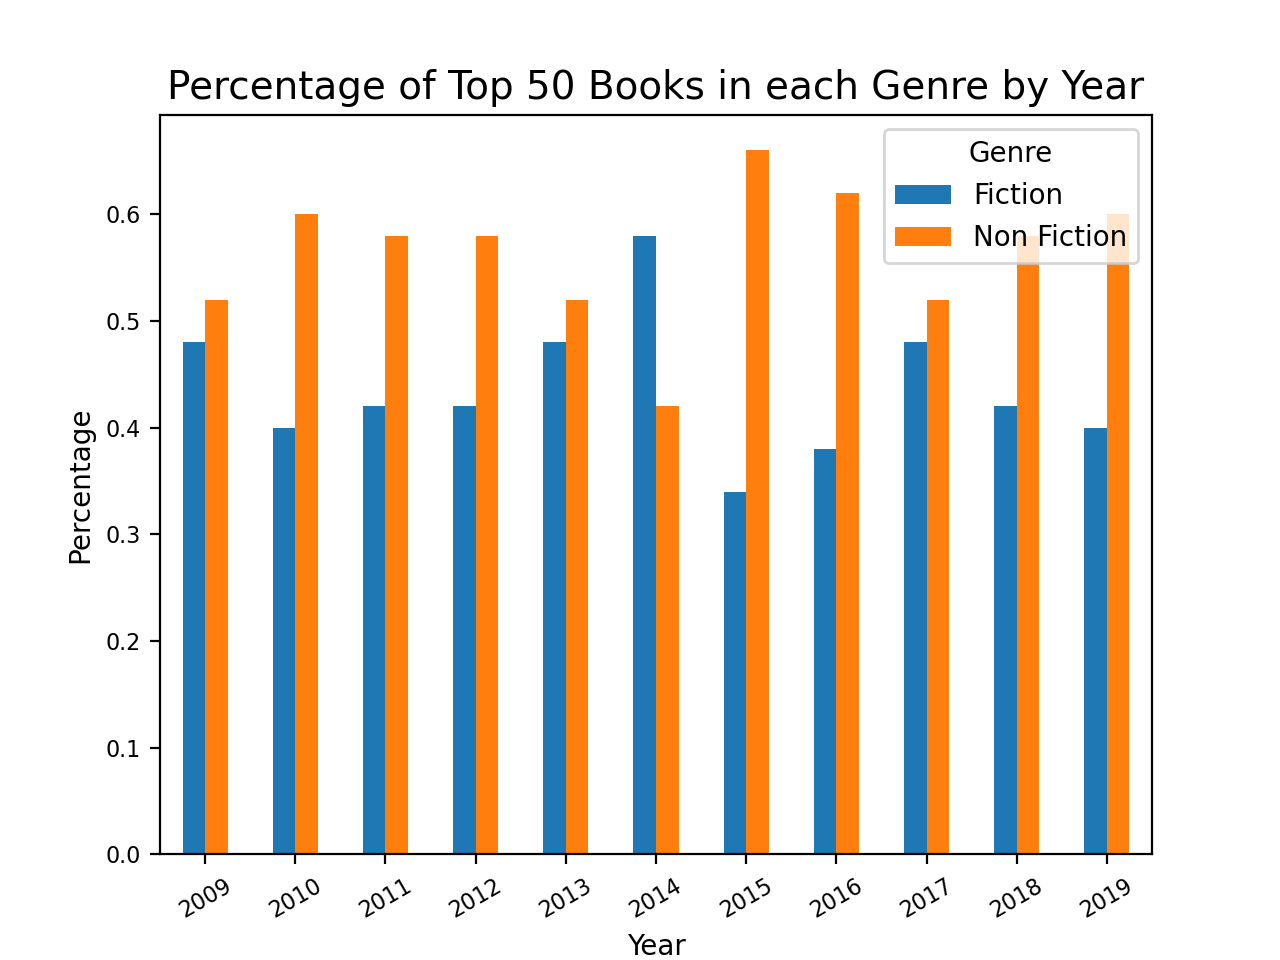

In [44]:
# Now I'm going to plot this on a bar chart.
genre_pcts.plot.bar()
plt.title("Percentage of Top 50 Books in each Genre by Year", fontsize=14)
plt.xlabel("Year", fontsize=10)
plt.xticks(fontsize=8, rotation=30)
plt.yticks(fontsize=8)
plt.ylabel("Percentage", fontsize=10)
plt.savefig('BarChart.pdf')

In [39]:
# The visualization above shows that typically more non fiction books reach the top 50, except in 2014.

<IPython.core.display.Javascript object>


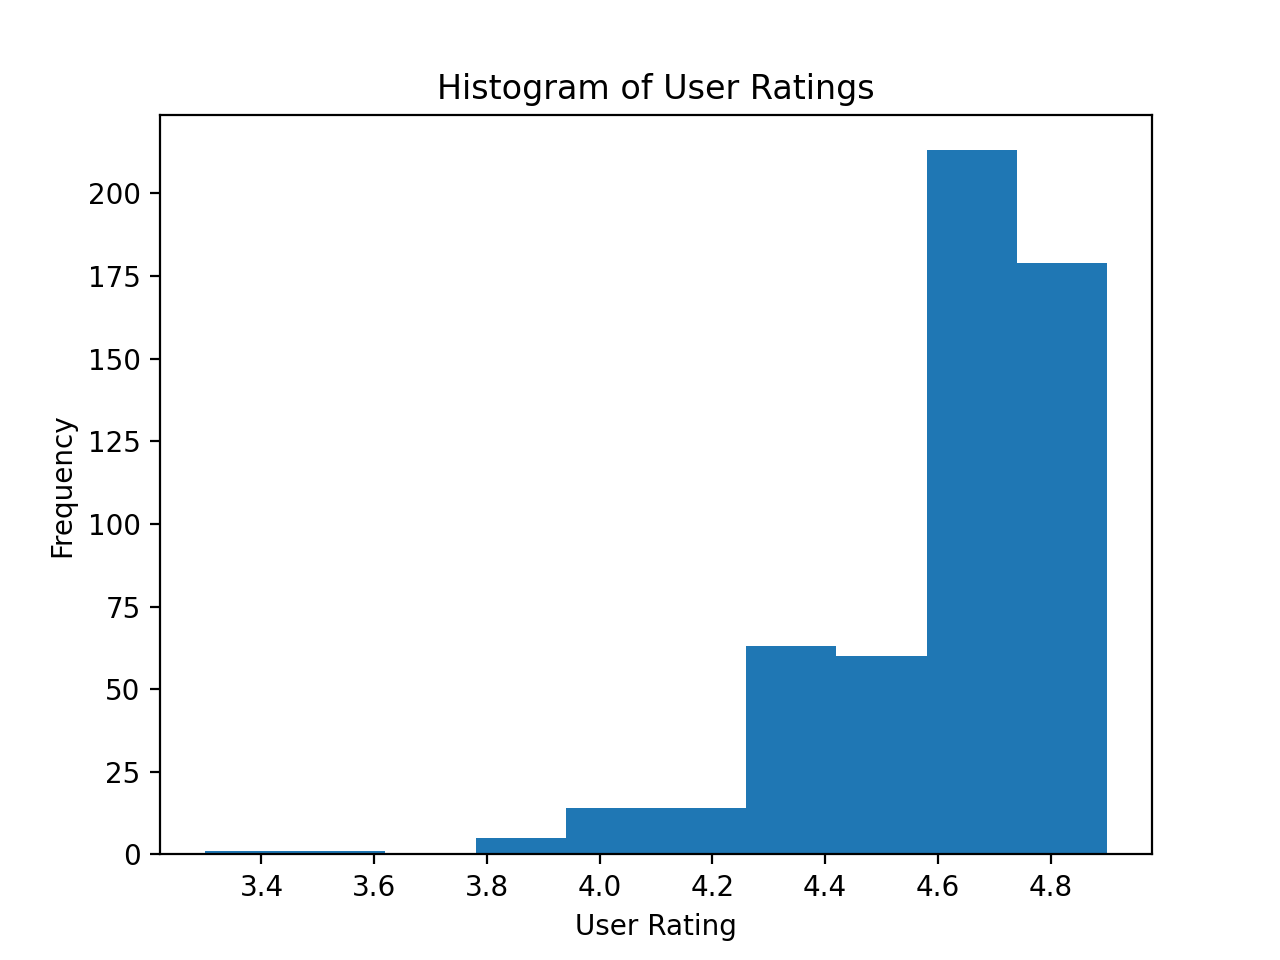

In [47]:
# Now to plot a histogram of User Ratings
plt.figure()
plt.title("Histogram of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
books['User Rating'].plot.hist()
plt.savefig('Histogram.pdf')

In [ ]:
# The data is left-skewed, but this was expected since these are the Top 50 best selling books, I would expect 
# that there would be more higher ratings, than not. 

In [58]:
# For my next visualization, I wanted to take a look at mean price by year. I will use the groupby function to 
# prepare the data for plotting. 
priceByYear = books.groupby('Year')['Price'].mean()

<IPython.core.display.Javascript object>


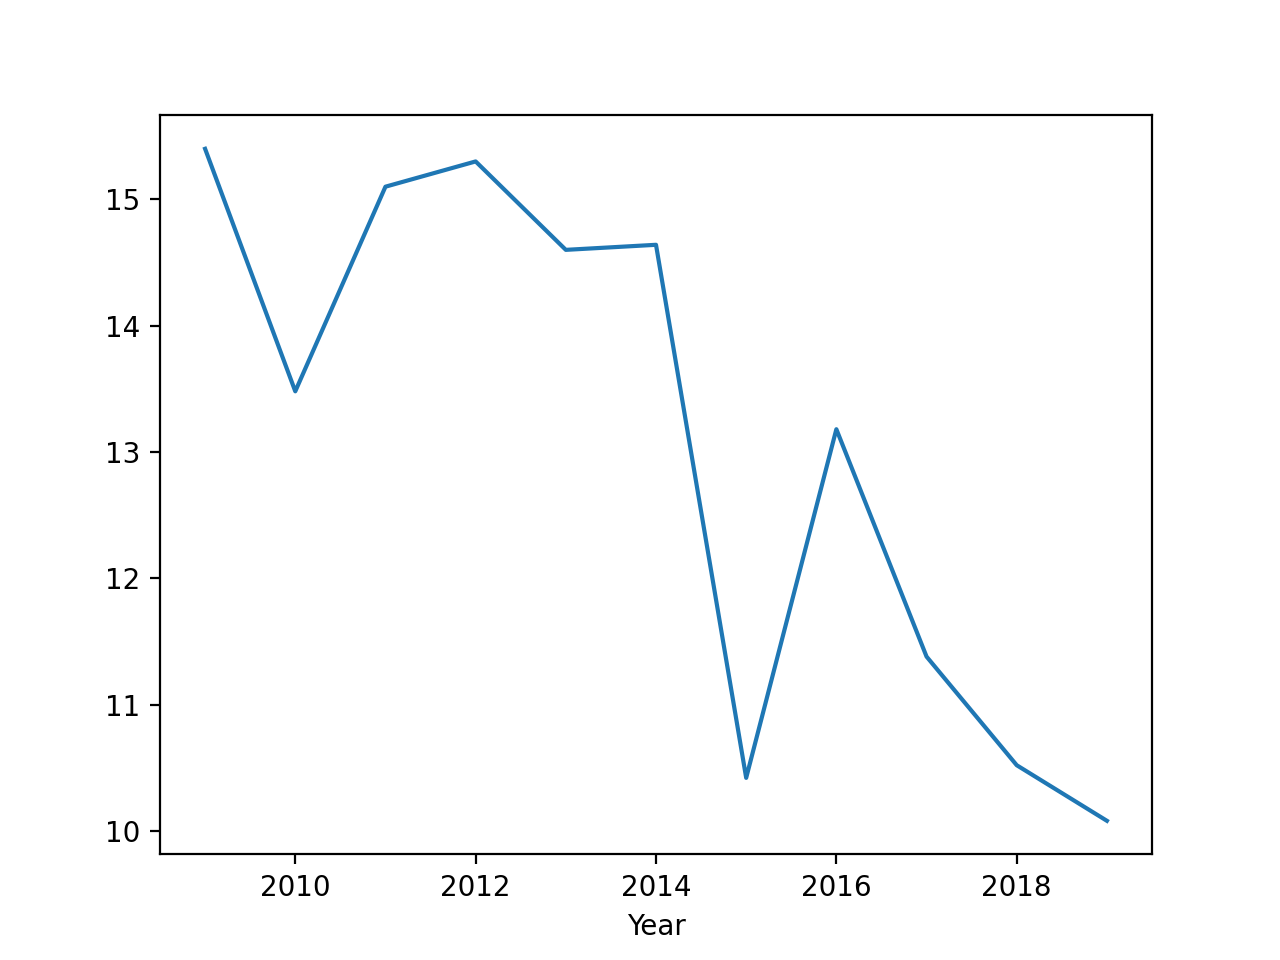

In [65]:
# I choose to use a line plot since there should be only one value per year. 
plt.figure()
priceByYear.plot()

In [69]:
# After reviewing the price data, I determined there were some outliers, that could have really skewed the data, 
# so I decided to remove books above $80 and free books because I believe they detract from the normal distribution. 
books_clean = books[(books.Price<80) & books.Price>0]
books_clean.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
13,A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction


<IPython.core.display.Javascript object>


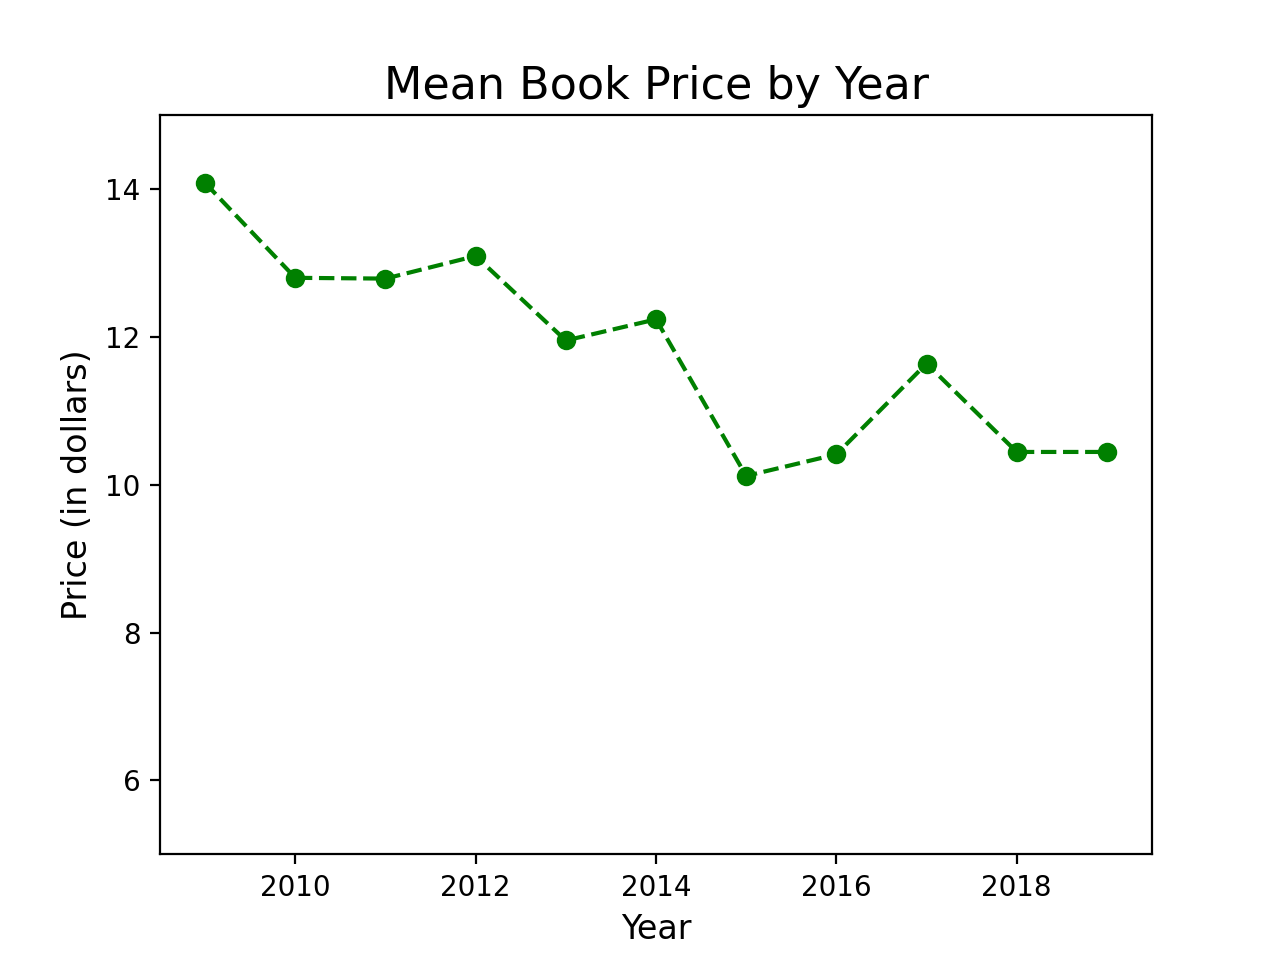

In [85]:
# Now I will use the cleaned data to make a line plot
clean_priceByYear = books_clean.groupby('Year')['Price'].mean()
plt.figure()
plt.title("Mean Book Price by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price (in dollars)", fontsize=12)
plt.ylim([5, 15])
plt.plot(clean_priceByYear, 'go--')
plt.savefig("lineplot.pdf")

In [ ]:
# We can see the mean price of books appears to be declining. I can only speculate this is because people are using
# e-readers more and buying less books, especially if they are expensive. A lot of the books on this list were childrens
# books and many of those have below average prices. 